# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Assignment


We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression. We want to build a simple model to determine how well Years Worked predicts an employee’s salary. Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

### Steps and questions

1. Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
# Additional libraries
from scipy import stats
from scipy.stats import iqr,pearsonr, norm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

sns.set()

In [2]:
# Getting the dataset
data = pd.read_csv("salary.csv")

# A view of the first five rows
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


#### Dealing with Missing Data

In [3]:
# Missing data
print("Total number of responders (target variable):\t{}".format(len(data)))
print("Number of columns with missing values:\t{}".format(len(data[data.isnull().any(axis=1)])))
print("\nA look at the row with missing value:")
data[data.isnull().any(axis=1)]

Total number of responders (target variable):	514
Number of columns with missing values:	1

A look at the row with missing value:


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [4]:
# Deleting row with missing data
data.dropna(inplace=True)

#### Detecting Outliers

Outlier definition:
Any data point that is more or less(upper and lower bound) than 3 times the standard deviation

In [5]:
data_std = np.std(data["salary"])
data_mean = np.mean(data["salary"])

outlier_cut_off = data_std * 3
        
lower_limit  = data_mean - outlier_cut_off 
upper_limit = data_mean + outlier_cut_off

# Df has no figures below the lower_limit variable, therefore only using upper_limit to filter out outliers
data = data[data["salary"] < int(upper_limit)]

#### A quick look at the feature and target variable

Salary variance: 148791366.51168084		Yearsworked variance: 89.41


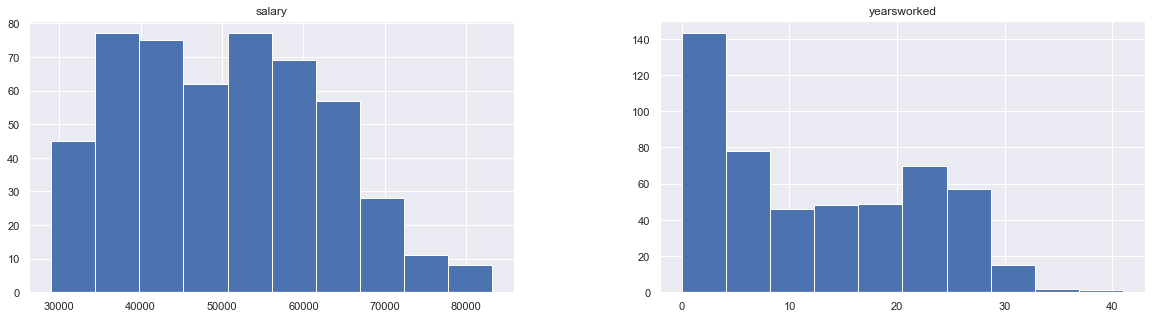

In [6]:
# Variance and Distribution charts
data[["salary", "yearsworked"]].hist(figsize=(20,5))
print("Salary variance: {}\t\tYearsworked variance: {}".
      format(data["salary"].var(),round(data["yearsworked"].var(),2)))

Due to the relatively high variance of the target variable, the variable will be transformed and the original
values kept for comparative purposes.

Salary_log variance: 0.05992787278703438		 Salary variance: 148791366.51168084


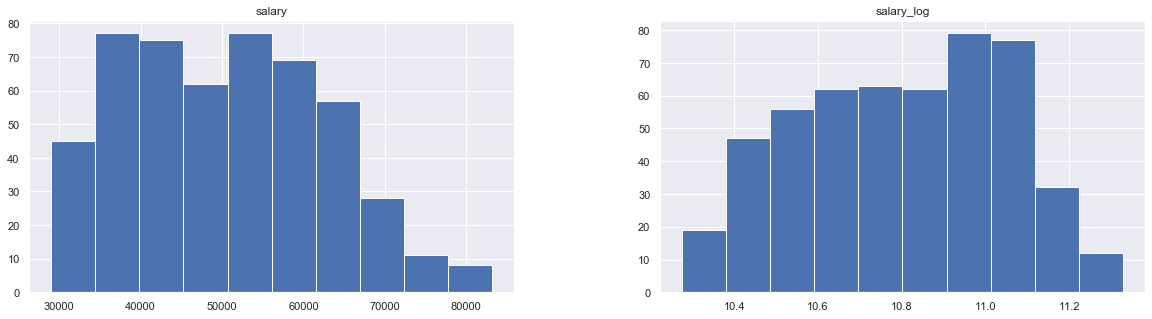

In [7]:
data["salary_log"] = np.log(data["salary"])

# Distribution of the newly created variables
data[["salary_log", "salary"]].hist(figsize=(20,5))
print("Salary_log variance: {}\t\t Salary variance: {}".format(data["salary_log"].var(),data["salary"].var() ))

#### Checking for Linearity

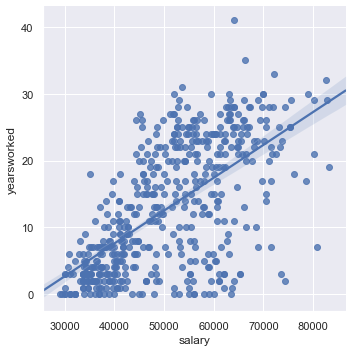

In [8]:
sns.lmplot(x='salary',y='yearsworked',data=data,fit_reg=True)

Looking at the above chart, one can conclude that a relationship between the independent variable and 
the dependent variable is indeed linear.

#### Spliting the dataset

In [9]:
# Define the dependent and independent variable
Y = data.salary
x = data.yearsworked

X_train, X_test, y_train, y_test = train_test_split(Y, x)

2.Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

#### Training a model

\begin{equation}
\hat{Y} = \beta_0 + \beta_1 X_i
\end{equation}

Where:

 Y is the prediction.
 
 beta 0 is the contant.
 
 beta 1 is the slope of the line and a is the y-intercept.
 
 X is the independent variable. 

In [10]:
# Ordinary Least Squares (OLS) regression
beta = sm.add_constant(X_train)

#model
model = sm.OLS(X_train, y_train).fit()

#results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              1254.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                   1.99e-122
Time:                        14:00:29   Log-Likelihood:                         -4400.9
No. Observations:                 381   AIC:                                      8804.
Df Residuals:                     380   BIC:                                      8808.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2837.7502     80.129     35.415      0.000    2680.199    2995.301
==============================================================================
Omnibus:                       14.912   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.108
Skew:                           0.064   Prob(JB):                       0.0286
Kurtosis:                       2.343   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, 
as there is less than a 5% probability the null is correct (and the results are random).**

**Generally r-squared below 50% percent are considered weak or low effect size, however in non-scientific models one can consider this a Moderate effect size. If this case a r-squared greater than 0.7 is considered strong in effect size**

3.What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

**For every year of experience one has, they could expect an increase in salary of 2927.85**

4.What do the 95% confidence intervals [0.025, 0.975] mean?

**The 95% confidence interval defines a range of values that you can be 95% certain contains the population mean**

5.Calculate the expected salary for someone with 12 years’ work experience.

In [11]:
print(12*2927.8446)

35134.1352


6.Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [12]:
print(80*2927.8446)

234227.568


In [13]:
# Min and Max values for salary and yearsworked
print("Min salary: {}\t\tMax salary: {}".format(min(X_train), max(X_train)))
print("Min yearsworked: {}\t\tMax yearsworked: {}".format(min(y_train), max(y_train)))


Min salary: 29500.0		Max salary: 83192.23438
Min yearsworked: 0		Max yearsworked: 35


**The above indicates why they might be a problem with the 80 year prediction. 
The model has been trained with yearsworked ranging from 0 to 35, therefore making a
prediction of 80 will result in an unexpected prediction since the model have never been training on such.**

7.We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [14]:
data.corr(method ='pearson')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,salary_log
salary,1.000000,0.084709,0.634237,0.603412,0.403768,0.041460,0.180277,0.708003,0.362652,-0.498564,-0.064088,0.992308
exprior,0.084709,1.000000,-0.255248,-0.086510,-0.046300,-0.052398,0.272167,0.107680,0.041141,-0.036892,0.137959,0.079255
yearsworked,0.634237,-0.255248,1.000000,0.814726,-0.074769,0.027109,-0.039034,0.745734,0.276154,-0.261624,0.058267,0.646269
yearsrank,0.603412,-0.086510,0.814726,1.000000,-0.034273,0.004010,0.010061,0.479373,0.233238,-0.260629,0.040409,0.590067
market,0.403768,-0.046300,-0.074769,-0.034273,1.000000,0.035371,0.023203,-0.020369,0.178701,-0.217242,-0.165756,0.411894
degree,0.041460,-0.052398,0.027109,0.004010,0.035371,1.000000,-0.214400,0.041937,0.060643,-0.098122,0.029952,0.049541
otherqual,0.180277,0.272167,-0.039034,0.010061,0.023203,-0.214400,1.000000,0.163503,0.017089,-0.078085,-0.018357,0.168088
position,0.708003,0.107680,0.745734,0.479373,-0.020369,0.041937,0.163503,1.000000,0.314384,-0.287138,0.033400,0.725381
male,0.362652,0.041141,0.276154,0.233238,0.178701,0.060643,0.017089,0.314384,1.000000,-0.127147,-0.621660,0.368125
Field,-0.498564,-0.036892,-0.261624,-0.260629,-0.217242,-0.098122,-0.078085,-0.287138,-0.127147,1.000000,-0.001666,-0.487850


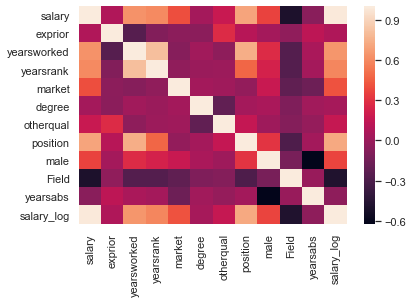

In [15]:
corr = data.corr(method ='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

exprior column could have been used instead of yearworked

How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
 
test_predict = model.predict(y_test)

rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [17]:
rmse

43393.93325961591

In [18]:
train_predict = model.predict(y_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predict))

rmse

45641.374351663304

# Conclusion

Test errors are lower then train errors, this could be due to the relatively small size of not only the test set but also the
overall dataset or the training data contains less predictive data points. For one to truely have an general idea on this model
performance cross-validation will have to be applied.